In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings("ignore")

OnlineNewsPopularity = pd.read_csv("project_data.csv")
print(OnlineNewsPopularity.columns)
print(OnlineNewsPopularity.shape)
OnlineNewsPopularity

Index(['url', 'timedelta', 'n_tokens_title', 'n_tokens_content',
       'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens',
       'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos',
       'average_token_length', 'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'lda_00',
       'lda_01', 'lda_02', 'lda_03', 'lda_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
     

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.70,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.70,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.00,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.80,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.00,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,http://mashable.com/2014/12/27/samsung-app-aut...,8.0,11.0,346.0,0.529052,1.0,0.684783,9.0,7.0,1.0,...,0.100000,0.75,-0.260000,-0.500,-0.125000,0.100000,0.000000,0.400000,0.000000,1800
39640,http://mashable.com/2014/12/27/seth-rogen-jame...,8.0,12.0,328.0,0.696296,1.0,0.885057,9.0,7.0,3.0,...,0.136364,0.70,-0.211111,-0.400,-0.100000,0.300000,1.000000,0.200000,1.000000,1900
39641,http://mashable.com/2014/12/27/son-pays-off-mo...,8.0,10.0,442.0,0.516355,1.0,0.644128,24.0,1.0,12.0,...,0.136364,0.50,-0.356439,-0.800,-0.166667,0.454545,0.136364,0.045455,0.136364,1900
39642,http://mashable.com/2014/12/27/ukraine-blasts/,8.0,6.0,682.0,0.539493,1.0,0.692661,10.0,1.0,1.0,...,0.062500,0.50,-0.205246,-0.500,-0.012500,0.000000,0.000000,0.500000,0.000000,1100


In [3]:
from sklearn.model_selection import cross_val_score,train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    OnlineNewsPopularity.drop(['shares', 'url'], axis = 1),
    OnlineNewsPopularity['shares'],
    test_size = 0.2,
    random_state = 42)

print(X_train.shape)
print(X_test.shape)

(31715, 59)
(7929, 59)


In [5]:
cleaned = OnlineNewsPopularity.drop(['url'], axis = 1)

In [6]:
cleaned_con = cleaned.drop(['data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'weekday_is_monday', 'weekday_is_tuesday', 'weekday_is_wednesday',
       'weekday_is_thursday', 'weekday_is_friday', 'weekday_is_saturday',
       'weekday_is_sunday', 'is_weekend', 'shares'], axis=1)
cleaned_con

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
0,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,...,0.378636,0.100000,0.70,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500
1,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,...,0.286915,0.033333,0.70,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000
2,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,...,0.495833,0.100000,1.00,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000
3,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,...,0.385965,0.136364,0.80,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000
4,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,...,0.411127,0.033333,1.00,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,8.0,11.0,346.0,0.529052,1.0,0.684783,9.0,7.0,1.0,1.0,...,0.333791,0.100000,0.75,-0.260000,-0.500,-0.125000,0.100000,0.000000,0.400000,0.000000
39640,8.0,12.0,328.0,0.696296,1.0,0.885057,9.0,7.0,3.0,48.0,...,0.374825,0.136364,0.70,-0.211111,-0.400,-0.100000,0.300000,1.000000,0.200000,1.000000
39641,8.0,10.0,442.0,0.516355,1.0,0.644128,24.0,1.0,12.0,1.0,...,0.307273,0.136364,0.50,-0.356439,-0.800,-0.166667,0.454545,0.136364,0.045455,0.136364
39642,8.0,6.0,682.0,0.539493,1.0,0.692661,10.0,1.0,1.0,0.0,...,0.236851,0.062500,0.50,-0.205246,-0.500,-0.012500,0.000000,0.000000,0.500000,0.000000


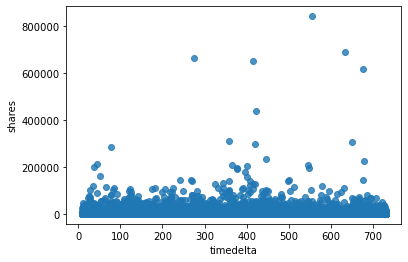

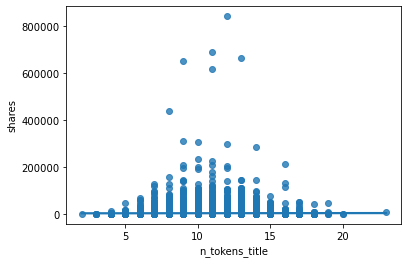

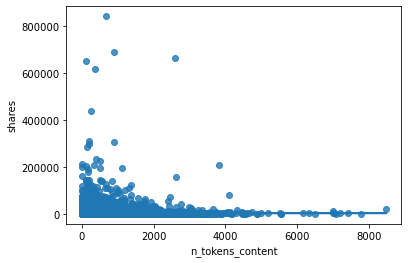

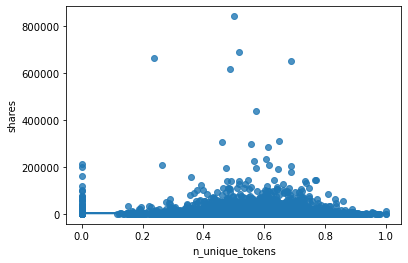

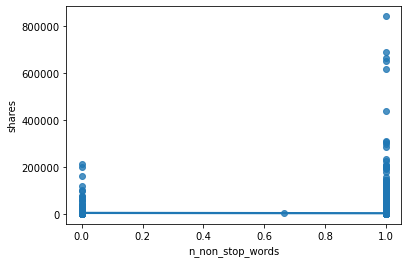

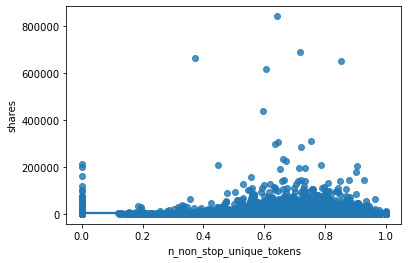

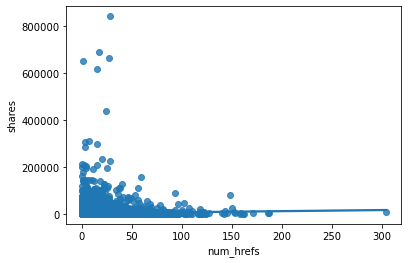

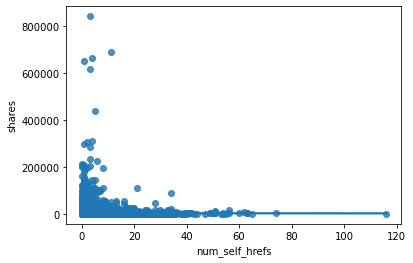

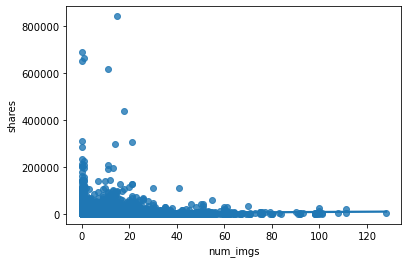

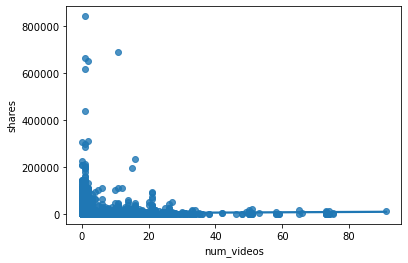

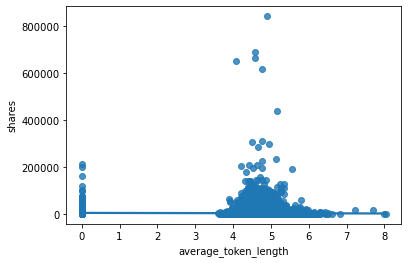

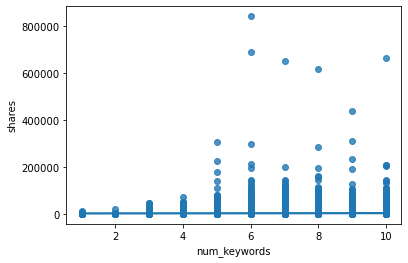

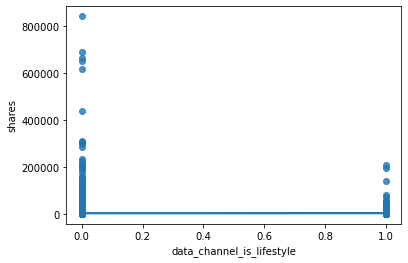

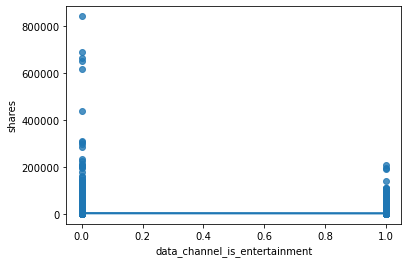

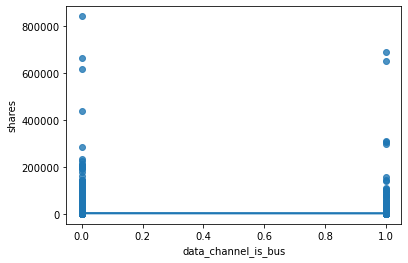

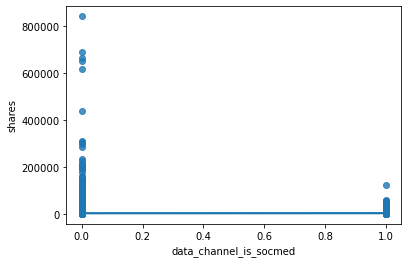

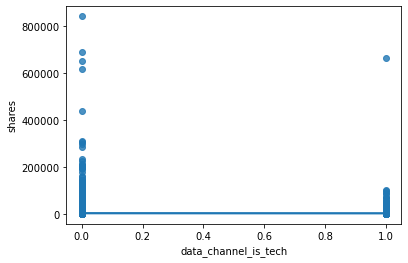

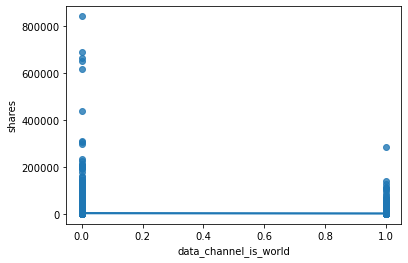

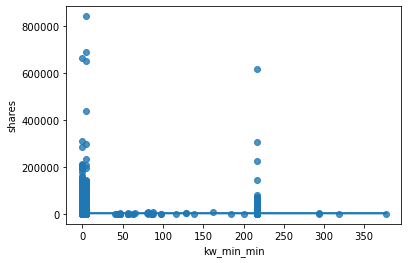

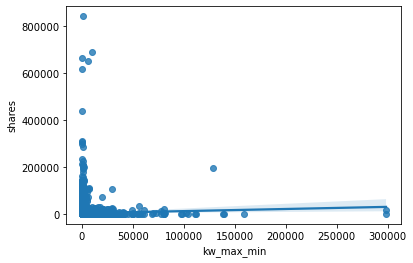

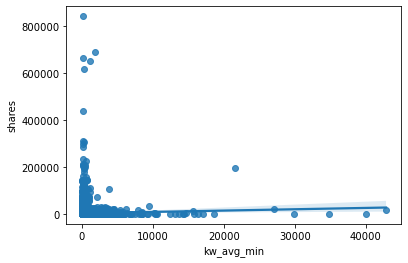

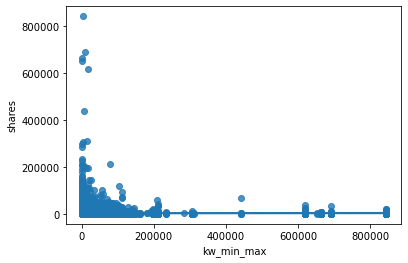

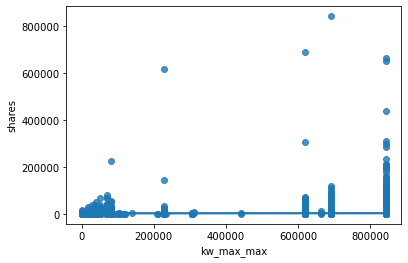

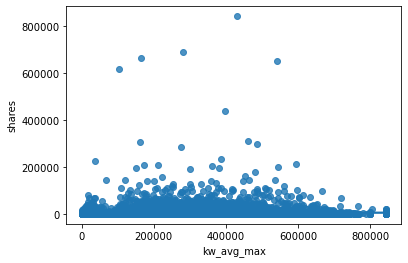

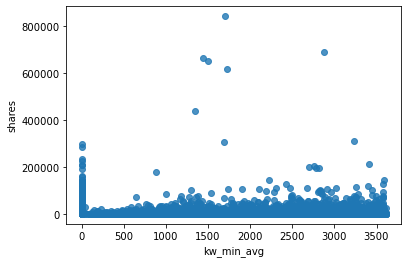

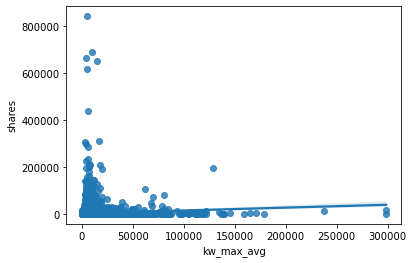

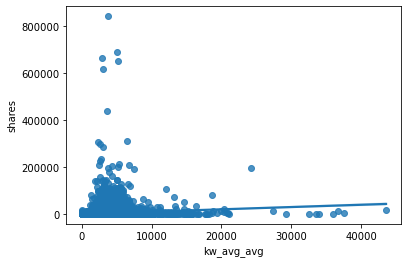

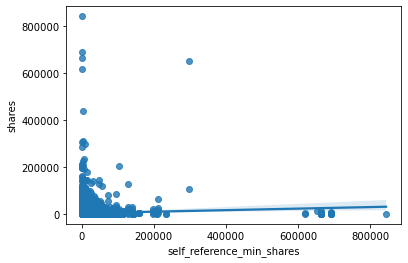

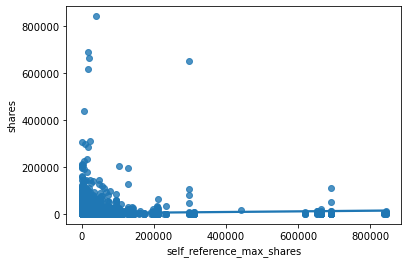

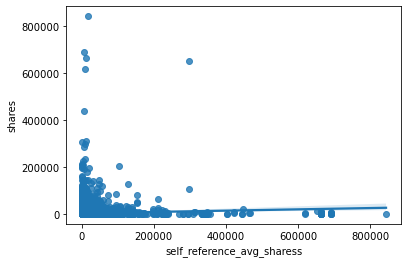

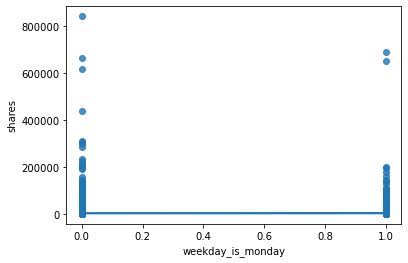

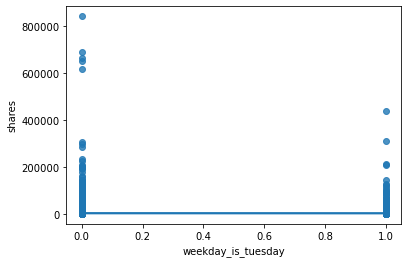

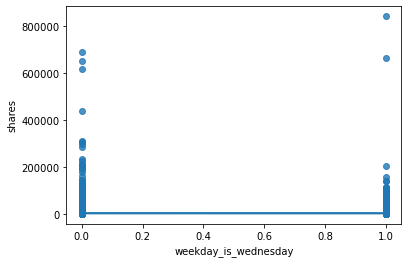

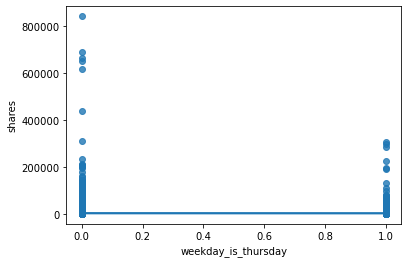

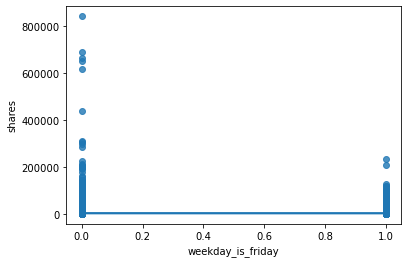

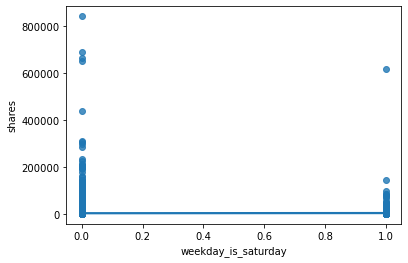

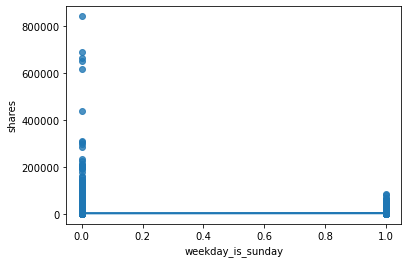

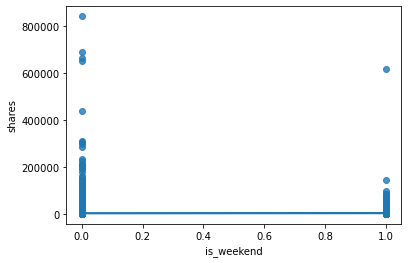

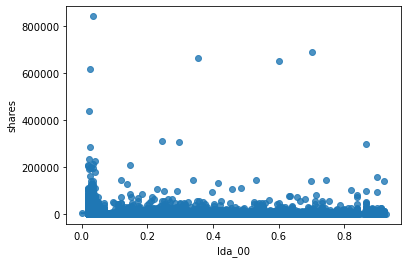

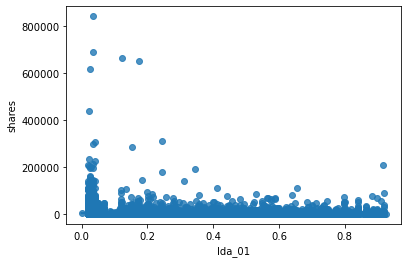

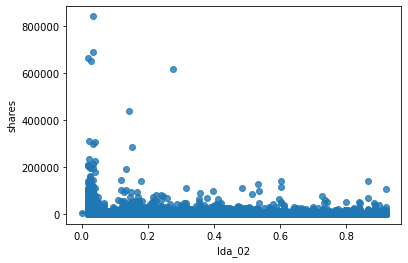

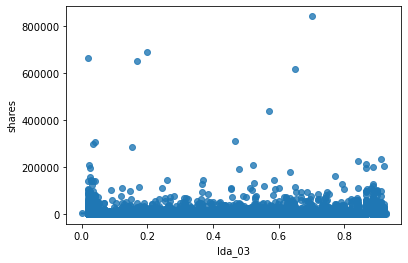

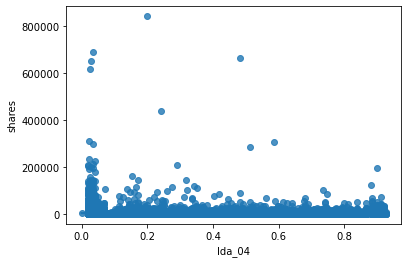

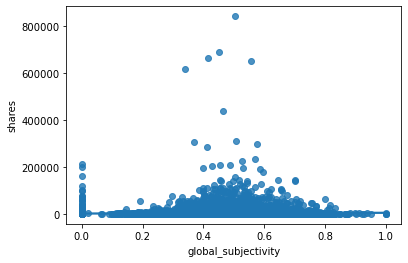

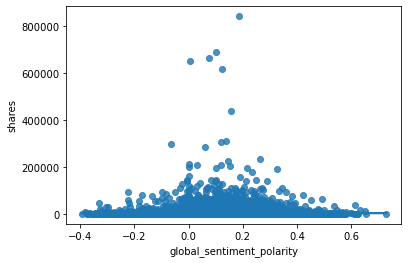

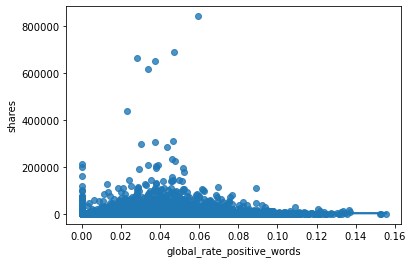

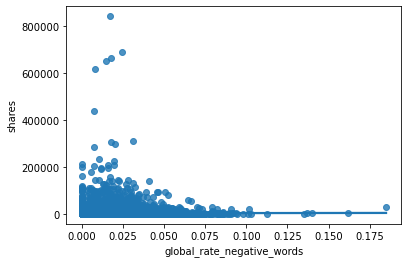

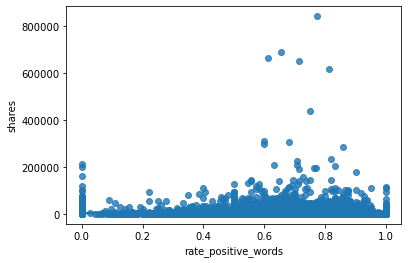

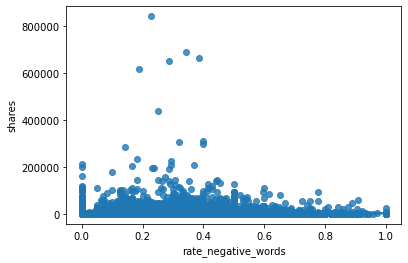

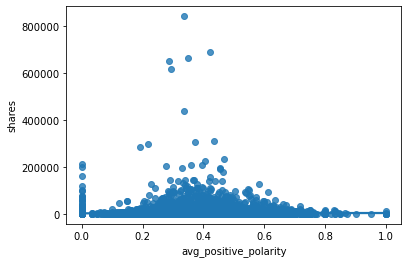

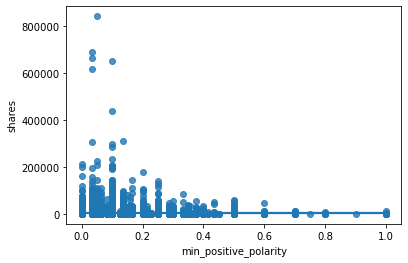

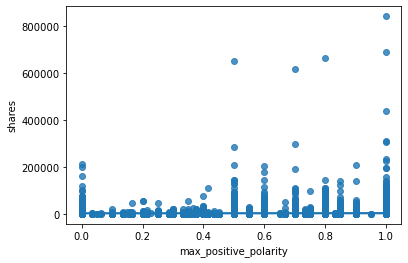

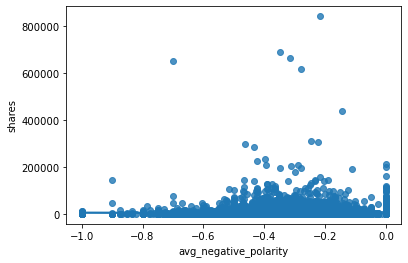

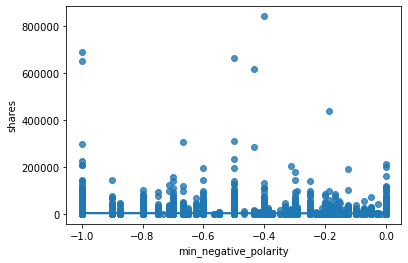

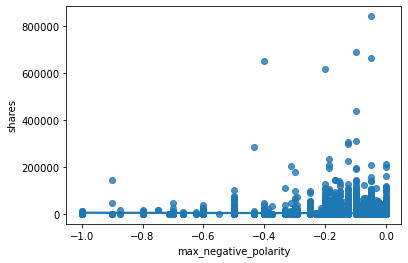

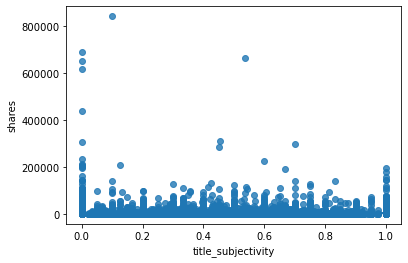

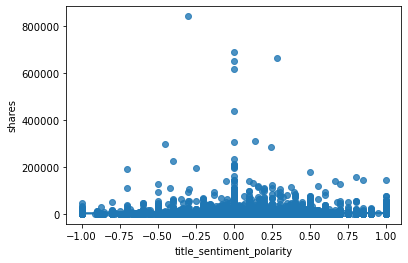

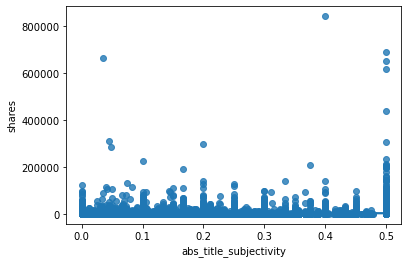

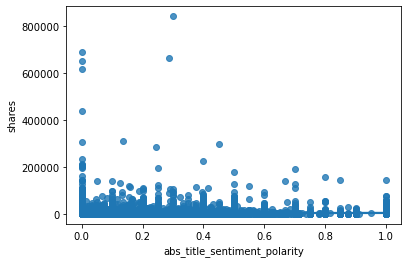

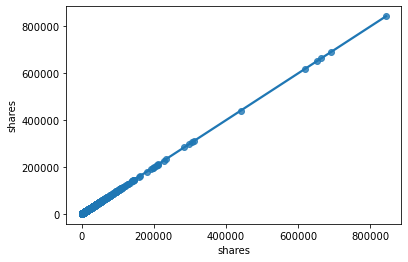

In [9]:
for x in cleaned:
    sns.regplot(x=x, y= 'shares', data=cleaned)
    plt.show()

In [10]:
import xgboost as xgb
model = xgb.XGBRegressor().fit(X_train, y_train)
pred = model.predict(X_test)

Text(0, 0.5, 'Actual')

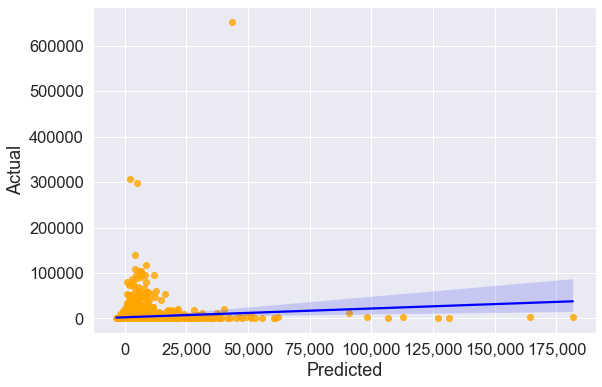

In [12]:
plt.rcParams["figure.figsize"] = (9,6)
sns.set(font_scale=1.5)
ax=sns.regplot(x = pred, y = y_test, scatter_kws={"color": "orange"}, line_kws={"color": "blue"})
ax.xaxis.set_major_formatter('{x:,.0f}')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')

In [13]:
from sklearn.metrics import mean_squared_error
print("XGBoost RMSE = ",np.sqrt(mean_squared_error(model.predict(X_test),y_test)))

XGBoost RMSE =  11866.057071192296


In [24]:
model_1 = xgb.XGBRegressor(random_state=1,max_depth=8,n_estimators=2000,
                                         learning_rate = 0.01,reg_lambda=0.01, gamma = 1, subsample = 0, colsample_bytree=1).fit(X_train, y_train)
from sklearn.metrics import mean_squared_error
print("XGBoost RMSE = ",np.sqrt(mean_squared_error(model_1.predict(X_test),y_test)))

XGBoost RMSE =  11477.81616056143


In [25]:
pred = model_1.predict(X_test)
from sklearn.metrics import r2_score 
R_square = r2_score(pred, y_test) 
print('Coefficient of Determination =', R_square) 

Coefficient of Determination = 0.0


In [27]:
from sklearn.model_selection import KFold
scores = cross_val_score(model_1, X_train, y_train, scoring='r2') 
scores.mean()

-0.12449389465842539

In [30]:
from sklearn.ensemble import GradientBoostingRegressor,GradientBoostingClassifier, BaggingRegressor,BaggingClassifier,RandomForestRegressor,RandomForestClassifier,AdaBoostRegressor,AdaBoostClassifier

model5 = GradientBoostingRegressor(max_depth = 8, n_estimators = 150, random_state = 1, loss = 'huber')
model5.fit(X_train, y_train)

y_pred = model5.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

10950.54006629574

In [31]:
from sklearn.model_selection import KFold
scores = cross_val_score(model5, X_train, y_train, scoring='r2') 
scores.mean()

0.007012518020388025

# MARS

In [66]:
from pyearth import Earth

model_2 = Earth(max_terms=2000, max_degree=1,feature_importance_type= 'rss') # note, terms in brackets are the hyperparameters 
model_2.fit(X_train,y_train)

Earth(feature_importance_type='rss', max_degree=1, max_terms=2000)

In [67]:
pred_3 = model_2.predict(X_test)
np.sqrt(mean_squared_error(pred_3,y_test))

10844.98090574865

In [68]:
from sklearn.model_selection import KFold
scores = cross_val_score(model_2, X_train, y_train, scoring='r2') 
scores.mean()

0.023350818872250788

In [69]:
model_3 = Earth(max_terms=500, max_degree=3) # note, terms in brackets are the hyperparameters 
model_3.fit(X_train,y_train)
pred_4 = model_3.predict(X_test)
np.sqrt(mean_squared_error(pred_4,y_test))

10845.39443493119

In [70]:
from sklearn.model_selection import KFold
scores = cross_val_score(model_3, X_train, y_train, scoring='r2') 
scores.mean()

-0.07202622670569485

In [71]:
rmse_df = pd.DataFrame(columns = {'degree', 'RMSE'})
cv = KFold(n_splits=5, random_state=1, shuffle=True)
counter = 0
for degree in np.arange(1, 3, 1):
    rmse_df.loc[counter, 'RMSE'] = np.sqrt(np.mean(-cross_val_score(Earth(max_terms=1000, max_degree = degree),
                                 X_train, y_train, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)))
    rmse_df.loc[counter, 'degree'] = degree
    counter = counter + 1

In [72]:
rmse_df.loc[np.argmin(rmse_df.RMSE),:]

RMSE      11675.755611
degree               1
Name: 0, dtype: object